# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Dependencies
import openweathermapy.core as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
##setup the lists i will use to store the values for each city into a list that i will put into a dataframe for charting 
lat = []
lng = []
nl = "\n"
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []  

##Created a append method to add all the values of intrest for the city to the appropriate list
def toappend(ct,cd,co,dt,hu,la,ln,mt,ws):
    City.append(ct)
    Cloudiness.append(cd)
    Country.append(co)
    Date.append(dt)
    Humidity.append(hu)
    Lat.append(la)
    Lng.append(ln)
    Max_Temp.append(mt)
    Wind_Speed.append(ws)

#Method to parse the value of intrest    
def parseinformation(response):
    #using Try and except to catch all the bad Valid [200] responses
    try:
        city_name = response["name"]
        cloudiness = response["clouds"]["all"]
        country = response["sys"]["country"]
        date = response["dt"]
        humidity = response["main"]["humidity"]
        lat = response["coord"]["lat"]
        lng = response["coord"]["lon"]
        max_temp = response["main"]["temp"]
        wind_speed = response["wind"]["speed"]
        appendvalues = [city_name,cloudiness,country,date,humidity,lat,lng,max_temp,wind_speed]
        toappend(*appendvalues)
        print(f"Processing {city_name}: {nl} cloudiness: {cloudiness},{nl} country: {country},date: {date}, humidity {humidity}, lat: {lat}, lng: {lng},wind speed: {wind_speed}, max temp {max_temp}  ")
    except KeyError:
        print("City Not Found, Skipping..")
        pass
    

#Loop to do the API query to the owm server
counter = 0
print(f"Len of City is is {len(cities)}")
for city in cities:
        url = "http://api.openweathermap.org/data/2.5/weather?"
        query_url = url + "appid=" + api_key + "&q=" + str(city)
        params = {"appid": api_key, "q": city}
        response = requests.get(query_url, params=params)
        response = response.json()
        parseinformation(response)
        counter += 1
        print(f"Loop number: {counter}")
#         if counter > 100:
#             break


#load all the list data into a dataframe
listtoadd = [City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed]
city_weather_data = pd.DataFrame(listtoadd)
city_weather_data = city_weather_data.T
#rename columns
city_weather_data = city_weather_data.rename(columns={0:"City",
                                                     1:"Cloudiness",
                                                     2:"Country",
                                                     3:"Date",
                                                     4:"Humidity",
                                                     5:"Lat",
                                                     6:"Lng",
                                                     7:"Max Temp",
                                                     8:"Wind Speed",})
city_weather_data

Len of City is is 619
Passed City
Processing Nanakuli: 
 cloudiness: 40,
 country: US,date: 1541977020, humidity 63, lat: 21.39, lng: -158.15,wind speed: 5.7, max temp 299.88  
Processing Jiazi: 
 cloudiness: 68,
 country: CN,date: 1541977200, humidity 94, lat: 19.61, lng: 110.49,wind speed: 2.78, max temp 296.15  
Processing Thompson: 
 cloudiness: 90,
 country: CA,date: 1541977200, humidity 65, lat: 55.74, lng: -97.86,wind speed: 4.6, max temp 257.15  
Processing Chaoyang: 
 cloudiness: 0,
 country: CN,date: 1541980318, humidity 79, lat: 41.58, lng: 120.44,wind speed: 1.51, max temp 273.61  
Processing New Norfolk: 
 cloudiness: 0,
 country: AU,date: 1541979000, humidity 39, lat: -42.78, lng: 147.06,wind speed: 4.6, max temp 292.15  
Processing Cape Town: 
 cloudiness: 0,
 country: ZA,date: 1541977200, humidity 77, lat: -33.93, lng: 18.42,wind speed: 3.1, max temp 290.15  
Processing Yenagoa: 
 cloudiness: 0,
 country: NG,date: 1541980321, humidity 94, lat: 4.92, lng: 6.26,wind speed

Processing Puerto Ayora: 
 cloudiness: 40,
 country: EC,date: 1541977200, humidity 73, lat: -0.74, lng: -90.35,wind speed: 7.7, max temp 297.15  
Processing Viedma: 
 cloudiness: 92,
 country: AR,date: 1541980347, humidity 92, lat: -40.81, lng: -62.99,wind speed: 6.33, max temp 286.335  
Processing Cherskiy: 
 cloudiness: 0,
 country: RU,date: 1541980088, humidity 62, lat: 68.75, lng: 161.3,wind speed: 1.91, max temp 251.46  
Processing Choya: 
 cloudiness: 44,
 country: RU,date: 1541980348, humidity 63, lat: 52.01, lng: 86.55,wind speed: 1.11, max temp 250.785  
Passed City
Processing Husavik: 
 cloudiness: 0,
 country: CA,date: 1541980349, humidity 83, lat: 50.56, lng: -96.99,wind speed: 6.46, max temp 266.385  
Processing Erenhot: 
 cloudiness: 0,
 country: CN,date: 1541980350, humidity 70, lat: 43.65, lng: 111.97,wind speed: 1.91, max temp 261.535  
Processing Moerai: 
 cloudiness: 92,
 country: PF,date: 1541980350, humidity 100, lat: -22.43, lng: -151.33,wind speed: 6.38, max temp

Processing East London: 
 cloudiness: 92,
 country: ZA,date: 1541979959, humidity 97, lat: -33.02, lng: 27.91,wind speed: 10.91, max temp 294.21  
Processing Slave Lake: 
 cloudiness: 1,
 country: CA,date: 1541977200, humidity 79, lat: 55.28, lng: -114.77,wind speed: 1.5, max temp 266.15  
Processing Lebu: 
 cloudiness: 64,
 country: ET,date: 1541980387, humidity 93, lat: 8.96, lng: 38.73,wind speed: 1.33, max temp 282.335  
Processing Sorland: 
 cloudiness: 92,
 country: NO,date: 1541980387, humidity 97, lat: 67.67, lng: 12.69,wind speed: 7.88, max temp 282.385  
Processing San Carlos de Bariloche: 
 cloudiness: 75,
 country: AR,date: 1541977200, humidity 76, lat: -41.13, lng: -71.31,wind speed: 2.6, max temp 284.15  
Processing Khatanga: 
 cloudiness: 76,
 country: RU,date: 1541980055, humidity 75, lat: 71.98, lng: 102.47,wind speed: 2.86, max temp 249.085  
Passed City
Processing Chara: 
 cloudiness: 20,
 country: GR,date: 1541976600, humidity 93, lat: 39.42, lng: 22.43,wind speed: 

Processing Ponta do Sol: 
 cloudiness: 88,
 country: BR,date: 1541980124, humidity 96, lat: -20.63, lng: -46,wind speed: 2.78, max temp 291.785  
Processing Monywa: 
 cloudiness: 36,
 country: MM,date: 1541980429, humidity 93, lat: 22.12, lng: 95.13,wind speed: 0.91, max temp 293.835  
Processing Cidreira: 
 cloudiness: 0,
 country: BR,date: 1541980429, humidity 89, lat: -30.17, lng: -50.22,wind speed: 5.98, max temp 294.835  
Processing Ilulissat: 
 cloudiness: 8,
 country: GL,date: 1541976600, humidity 71, lat: 69.22, lng: -51.1,wind speed: 1.73, max temp 259.15  
Processing Pacific Grove: 
 cloudiness: 1,
 country: US,date: 1541979300, humidity 13, lat: 36.62, lng: -121.92,wind speed: 7.2, max temp 295.39  
Processing Moron: 
 cloudiness: 40,
 country: VE,date: 1541977200, humidity 83, lat: 10.49, lng: -68.2,wind speed: 1.33, max temp 300.15  
Processing Boksitogorsk: 
 cloudiness: 32,
 country: RU,date: 1541980432, humidity 73, lat: 59.47, lng: 33.85,wind speed: 4.41, max temp 269.

Processing Buchanan: 
 cloudiness: 75,
 country: LR,date: 1541977200, humidity 94, lat: 5.88, lng: -10.05,wind speed: 1.5, max temp 298.15  
Passed City
Processing Tabou: 
 cloudiness: 20,
 country: CI,date: 1541980465, humidity 100, lat: 4.42, lng: -7.36,wind speed: 2.61, max temp 301.235  
Processing Avarua: 
 cloudiness: 40,
 country: CK,date: 1541977200, humidity 69, lat: -21.21, lng: -159.78,wind speed: 4.6, max temp 300.15  
Processing Zhezkazgan: 
 cloudiness: 0,
 country: KZ,date: 1541980466, humidity 62, lat: 47.8, lng: 67.71,wind speed: 4.13, max temp 253.485  
Processing Mackay: 
 cloudiness: 75,
 country: CA,date: 1541977200, humidity 73, lat: 53.65, lng: -115.58,wind speed: 3.1, max temp 270.65  
Processing Paso de Carrasco: 
 cloudiness: 75,
 country: UY,date: 1541977200, humidity 94, lat: -34.86, lng: -56.05,wind speed: 5.1, max temp 293.15  
Processing Okha: 
 cloudiness: 92,
 country: RU,date: 1541980467, humidity 99, lat: 53.59, lng: 142.95,wind speed: 8.76, max temp 

Processing Dennery: 
 cloudiness: 40,
 country: LC,date: 1541977200, humidity 88, lat: 13.9, lng: -60.89,wind speed: 2.6, max temp 299.65  
Processing Masvingo: 
 cloudiness: 0,
 country: ZW,date: 1541980503, humidity 71, lat: -20.08, lng: 30.83,wind speed: 2.83, max temp 286.21  
Processing Kaduqli: 
 cloudiness: 0,
 country: SD,date: 1541980503, humidity 27, lat: 11.01, lng: 29.72,wind speed: 3.41, max temp 292.935  
Processing Helmsdale: 
 cloudiness: 8,
 country: GB,date: 1541978400, humidity 87, lat: 58.12, lng: -3.65,wind speed: 2.1, max temp 278.74  
Processing Guerrero Negro: 
 cloudiness: 0,
 country: MX,date: 1541980504, humidity 52, lat: 27.97, lng: -114.04,wind speed: 4.31, max temp 295.36  
Passed City
Processing Kargasok: 
 cloudiness: 68,
 country: RU,date: 1541980505, humidity 77, lat: 59.06, lng: 80.87,wind speed: 4.08, max temp 259.46  
Processing Lompoc: 
 cloudiness: 1,
 country: US,date: 1541979300, humidity 13, lat: 34.64, lng: -120.46,wind speed: 2.6, max temp 29

Processing Belle Fourche: 
 cloudiness: 90,
 country: US,date: 1541978100, humidity 74, lat: 44.67, lng: -103.85,wind speed: 3.1, max temp 271.15  
Processing Atkinson: 
 cloudiness: 1,
 country: US,date: 1541979300, humidity 71, lat: 41.42, lng: -90.02,wind speed: 3.16, max temp 275.17  
Passed City
Processing Nuuk: 
 cloudiness: 0,
 country: GL,date: 1541976600, humidity 85, lat: 64.17, lng: -51.74,wind speed: 1.51, max temp 268.15  
Processing Holbeach: 
 cloudiness: 0,
 country: GB,date: 1541976960, humidity 93, lat: 52.8, lng: 0.02,wind speed: 3.1, max temp 280.34  
Processing Kodiak: 
 cloudiness: 90,
 country: US,date: 1541976780, humidity 70, lat: 39.95, lng: -94.76,wind speed: 2.6, max temp 278.15  
Processing Zilair: 
 cloudiness: 0,
 country: RU,date: 1541980539, humidity 62, lat: 52.23, lng: 57.44,wind speed: 1.11, max temp 250.985  
Processing Labuhan: 
 cloudiness: 12,
 country: ID,date: 1541980540, humidity 89, lat: -2.54, lng: 115.51,wind speed: 1.38, max temp 298.86  


Processing Buala: 
 cloudiness: 80,
 country: SB,date: 1541980575, humidity 96, lat: -8.15, lng: 159.59,wind speed: 5.26, max temp 300.61  
Processing Kungurtug: 
 cloudiness: 68,
 country: RU,date: 1541980576, humidity 74, lat: 50.6, lng: 97.53,wind speed: 2.41, max temp 265.035  
Processing Santa Maria: 
 cloudiness: 0,
 country: BR,date: 1541977200, humidity 73, lat: -29.69, lng: -53.81,wind speed: 1, max temp 298.15  
Processing Evensk: 
 cloudiness: 0,
 country: RU,date: 1541980579, humidity 100, lat: 61.92, lng: 159.24,wind speed: 6.31, max temp 262.56  
Processing Villarrica: 
 cloudiness: 48,
 country: CL,date: 1541980580, humidity 96, lat: -39.28, lng: -72.23,wind speed: 0.43, max temp 282.36  
Processing Udachnyy: 
 cloudiness: 0,
 country: RU,date: 1541980581, humidity 55, lat: 66.42, lng: 112.4,wind speed: 2.26, max temp 248.785  
Processing Santa Fe: 
 cloudiness: 36,
 country: AR,date: 1541980582, humidity 96, lat: -31.62, lng: -60.7,wind speed: 4.13, max temp 294.735  
P

Processing Santa Isabel: 
 cloudiness: 75,
 country: CO,date: 1541977200, humidity 94, lat: 4.71, lng: -75.1,wind speed: 0.91, max temp 297.15  
Processing Itoman: 
 cloudiness: 75,
 country: JP,date: 1541979000, humidity 60, lat: 26.12, lng: 127.67,wind speed: 1.5, max temp 294.7  
Processing Changli: 
 cloudiness: 92,
 country: CN,date: 1541980620, humidity 97, lat: 30.54, lng: 105.42,wind speed: 0.48, max temp 282.71  
Processing Great Falls: 
 cloudiness: 90,
 country: US,date: 1541979840, humidity 79, lat: 47.5, lng: -111.29,wind speed: 1.5, max temp 270  
Processing Koson: 
 cloudiness: 0,
 country: UZ,date: 1541977200, humidity 71, lat: 39.04, lng: 65.59,wind speed: 1.28, max temp 276.15  
Processing Verkhnyaya Toyma: 
 cloudiness: 20,
 country: RU,date: 1541980622, humidity 75, lat: 62.24, lng: 45,wind speed: 4.03, max temp 265.135  
Processing Cururupu: 
 cloudiness: 8,
 country: BR,date: 1541980625, humidity 80, lat: -1.82, lng: -44.87,wind speed: 3.76, max temp 299.785  
Pro

Processing Javanrud: 
 cloudiness: 76,
 country: IR,date: 1541980659, humidity 92, lat: 34.8, lng: 46.49,wind speed: 0.98, max temp 278.21  
Processing Vanavara: 
 cloudiness: 0,
 country: RU,date: 1541980659, humidity 78, lat: 60.35, lng: 102.28,wind speed: 2.18, max temp 245.11  
Processing Santiago: 
 cloudiness: 20,
 country: CL,date: 1541977200, humidity 66, lat: -33.44, lng: -70.65,wind speed: 3.6, max temp 291.15  
Processing Moratuwa: 
 cloudiness: 0,
 country: LK,date: 1541977800, humidity 94, lat: 6.77, lng: 79.88,wind speed: 1.5, max temp 295.15  
Processing San Nicolas: 
 cloudiness: 100,
 country: HN,date: 1541980662, humidity 75, lat: 14.94, lng: -88.33,wind speed: 1.13, max temp 295.985  
Processing Bubaque: 
 cloudiness: 0,
 country: GW,date: 1541977200, humidity 88, lat: 11.28, lng: -15.83,wind speed: 2.6, max temp 299.15  
Processing Kot Addu: 
 cloudiness: 8,
 country: PK,date: 1541980663, humidity 74, lat: 30.47, lng: 70.97,wind speed: 2.61, max temp 290.11  
Proces

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Nanakuli,40,US,1541977020,63,21.39,-158.15,299.88,5.7
1,Jiazi,68,CN,1541977200,94,19.61,110.49,296.15,2.78
2,Thompson,90,CA,1541977200,65,55.74,-97.86,257.15,4.6
3,Chaoyang,0,CN,1541980318,79,41.58,120.44,273.61,1.51
4,New Norfolk,0,AU,1541979000,39,-42.78,147.06,292.15,4.6
5,Cape Town,0,ZA,1541977200,77,-33.93,18.42,290.15,3.1
6,Yenagoa,0,NG,1541980321,94,4.92,6.26,296.885,1.96
7,Nikolskoye,90,RU,1541977200,80,59.7,30.79,275.15,5
8,Dikson,24,RU,1541980322,100,73.51,80.55,256.585,4.73
9,Tashigang,0,CN,1541980322,60,29.3,88.13,257.985,1.06


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
#map the latitude, temp, humidity, cloudiness and wind to variables to use for charting.
latitude = city_weather_data["Lat"]
humidity = city_weather_data["Humidity"]
cloudiness = city_weather_data["Cloudiness"]

#converted K -> F Temp
temp = city_weather_data["Max Temp"] - 273.15
temp = temp * (9/5) + 32
temp = temp

#converted wind from meter/sec to mhp
wind = city_weather_data["Wind Speed"] * 2.23694


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

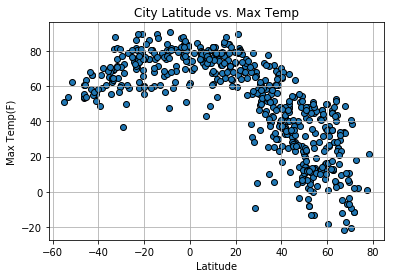

In [23]:

#Scatter plot with Lat and temp with edgedcolors
plt.scatter(latitude,temp,edgecolors="black")

#adding lables to plot
plt.xlabel("Latitude")
plt.ylabel("Max Temp(F)")
plt.title("City Latitude vs. Max Temp")

#using grid and saving graph
plt.grid()
plt.savefig("City Latitude vs. Max Temp.jpg")

#### Latitude vs. Humidity Plot

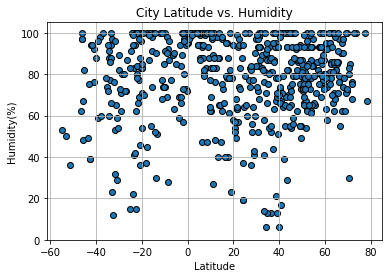

In [22]:
#Scatter plot with Lat and humidity with edgedcolors
plt.scatter(latitude,humidity,edgecolors="black")

#adding lables to plot
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("City Latitude vs. Humidity")
plt.grid()

#looked like there was a bad data set in the pull, went over 100%
plt.ylim(0,105)

#using grid and saving graph
plt.savefig("City Latitude vs. Humidity.jpg")


#### Latitude vs. Cloudiness Plot

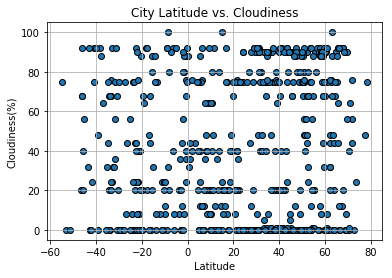

In [21]:
#Scatter plot with Lat and temp with edgedcolors
plt.scatter(latitude,cloudiness,edgecolors="black")

#adding lables to plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Latitude vs. Cloudiness")

#using grid and saving graph
plt.grid()
plt.savefig("City Latitude vs. Cloudiness.jpg")

#### Latitude vs. Wind Speed Plot

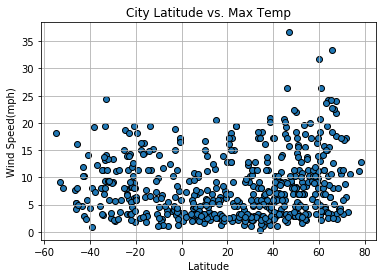

In [20]:
#Scatter plot with Lat and temp with edgedcolors
plt.scatter(latitude,wind,edgecolors="black")

#adding lables to plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title("City Latitude vs. Max Temp")

#using grid and saving graph
plt.grid()
plt.savefig("City Latitude vs. Max Temp.jpg")